In [31]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

symbolic = '[<>?,%()]|nan|NAN|NaN|na|NA'

In [32]:
def pca(data, n_components, threshold=0.95 ):
    # Step 1: Standardize the data (zero mean and unit variance)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(standardized_data, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = eigenvalues / total_variance
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    # Step 5: Select the top n_components eigenvectors
    top_n = 0
    for index, sum_variance in enumerate(cumulative_explained_variance_ratio):
        # print(index, sum_variance)
        top_n = index + 1
        if sum_variance >= 0.95:
            break
    print(f"top_n components is {top_n}")
    top_components = eigenvectors[:, :top_n]

    # Step 6: Project the data onto the principal components
    projected_data = np.dot(standardized_data, top_components)

    return projected_data, eigenvalues[:n_components], top_components, explained_variance_ratio, cumulative_explained_variance_ratio


In [33]:
def preprocessing(data):
    columns = data.columns
    for column in columns:
        new_values = []
        for cell in data[column]:
            new_value = str(cell)
            new_value = re.sub(symbolic, '', new_value)       # del symbolic
            new_value = new_value.strip()                     # del space
            if new_value == '':
                new_value = None
            elif new_value.find(' kha') >= 0:
                new_value = new_value.replace(' kha', '')
                new_value = float(new_value) * 1000.0
            elif new_value.find(' Mha') >= 0:
                new_value = new_value.replace(' Mha', '')
                new_value = float(new_value) * 1000000.0
            elif new_value.find(' ha') >= 0:
                new_value = new_value.replace(' ha', '')
                new_value = float(new_value)
            else:
                # print(column, new_value)
                new_value = float(new_value)
            # print(new_value)
            new_values.append(new_value)
        data[column] = new_values
        data[column] = data[column].replace(to_replace='NAN', value='0')   # NAN(string)
        data[column] = data[column].astype(str).astype(float)

    data = np.nan_to_num(data, nan=0, posinf=0, neginf=0)                  # NAN(Numpy)
    return data

In [34]:
file_path = 'C:\\Users\\HP\\Desktop\\MLIS PROJECT\\Butterfly_Data_extended (1).xlsx'

numerical_columns = [
        'Number of species',
        'area',
        'latitude',
        'Amount of forest lost 2023',
        '% Of landmass used for agriculture',
        'Metres from Sea Level',
        'plant species',
        'the average Annual Relative Humidity',
        'Agricultural land percentage (0-100%)',
        'forest area %'
    ]

In [35]:
data = pd.read_excel(file_path)
new_data = data[numerical_columns]
data_array = preprocessing(new_data)


# Perform PCA
max_num_features = min(data.shape) - 1    
projected_data, explained_variance, components, expected_variance, cumu_variances = pca(data_array, n_components=max_num_features)

# Print results
print("Projected Data:")
print(projected_data)
print("\nExplained Variance:")
print(f"\nNumber of Selected Principal Components: {components.shape[1]}")
print()

top_n components is 7
Projected Data:
[[ 5.36293192e-01 -7.96854958e-01 -1.45304526e-01  3.60869757e-01
  -5.87379591e-01 -1.61888505e-01  8.59712826e-01]
 [ 1.42021144e+00  2.69493151e-01  3.08393688e-02  1.66399449e-01
   2.88311532e-01 -2.22680385e-01 -2.90419283e-02]
 [ 8.18414258e-01  2.87691156e-02  4.79574382e-03  3.10568552e-01
  -2.90594317e-01  1.16691727e-01  2.21745951e-01]
 [ 6.99138225e-01 -1.36805006e+00  6.66450916e-01 -3.07065549e-01
   1.37332528e+00 -2.23027960e-01 -5.46619721e-02]
 [ 1.20176530e+00  3.96459838e-01 -1.87758159e-01  3.80543888e-01
  -3.37987634e-01 -4.64890112e-02  2.09581304e-01]
 [ 1.95209038e+00  1.39967532e+00 -4.42311154e-02  2.90853610e-01
   1.13760104e-01 -3.20720493e-01 -3.82008661e-01]
 [ 1.17911862e+00 -1.23403646e+00 -9.51799037e-01  2.46174558e-01
   2.18151211e-01  3.95605837e-01  1.09071107e+00]
 [ 8.41310860e-01 -4.05309876e+00 -4.29513206e+00 -3.04444031e+00
  -2.17820678e+00 -7.34765420e-01 -2.23888417e+00]
 [ 3.88214678e-01 -5.25882

C:\Users\HP\AppData\Local\Temp\ipykernel_16064\1809257685.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = new_values
C:\Users\HP\AppData\Local\Temp\ipykernel_16064\1809257685.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].replace(to_replace='NAN', value='0')   # NAN(string)
C:\Users\HP\AppData\Local\Temp\ipykernel_16064\1809257685.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

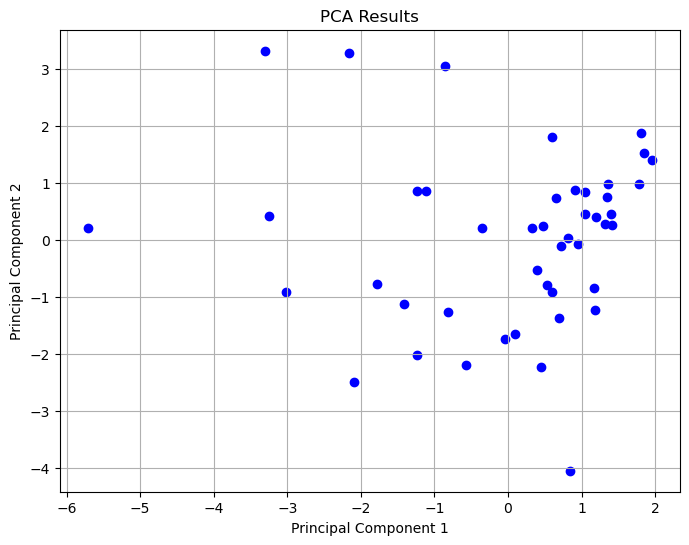

In [36]:
# Visualize the first 2 projected data
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color="blue")
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()